# Reaizado por:

**Cesar Augusto Saenz Jimenez**

**Ricardo Alejadro Giraldo**

**Laura Manuela Caro**

<h1 style="color: yellow">Support Vector Machin</h1>

In [1]:
# Cargue las bibliotecas 
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
sns.set()

In [2]:
df = pd.read_excel('BD_TRABAJO_GRADO.xlsx', engine='openpyxl')
df.head()

,Edad,Genero,Estado_Civil,Tpo_Contrato,Estado_Empleado,Fecha_Ingreso,Fecha_Retiro,Dias_Permanencia,Motivo_Retiro,Tipo_Cargo,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,ERI
0,36,M,NaN,Fijo,Retirado,2018-02-03,2018-02-19,16,Renuncia,Operativos y Auxiliares,42,25,20,10,23,21,37,PS
1,37,M,NaN,Fijo,Retirado,2018-08-02,2020-11-06,827,Renuncia,Operativos y Auxiliares,16,11,31,14,8,3,15,PS
2,40,M,NaN,Fijo,Retirado,2018-08-13,2019-02-07,178,Renuncia,Operativos y Auxiliares,33,22,21,13,22,20,42,PS
3,35,M,NaN,Fijo,Retirado,2019-02-23,2019-09-20,209,Renuncia,Operativos y Auxiliares,24,21,25,17,21,7,17,PS
4,42,F,NaN,Fijo,Retirado,2018-02-17,2019-07-22,520,Renuncia,Operativos y Auxiliares,40,23,31,48,25,40,23,PS


### Limpieza de datos (Data Cleaning) y preparación

In [3]:
#filtramos solo aquellos empleados que su Tipo_Cargo sean Operativos y Auxiliares que son los que representan el 90% de la data y son los que mas rotacion tienen y Elimino la variable que no aportan al modelo 
df = df.loc[df['Tipo_Cargo'] == 'Operativos y Auxiliares']
df = df.drop(["Fecha_Ingreso", "Fecha_Retiro","Tipo_Cargo","Motivo_Retiro","Estado_Civil","Dias_Permanencia"], axis=1)
df["Estado_Empleado"].replace({"Activo": 1, "Retirado": 0}, inplace=True) #reemplace los valores de estado del empleado asi Activos por 1 y Retirados por 0
df.sample(8)

,Edad,Genero,Tpo_Contrato,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,ERI
6828,23,M,Indefinido,1,22,23,27,15,18,11,20,DP
10001,34,M,Fijo,1,33,17,20,19,1,14,9,DP
7435,29,F,Indefinido,1,32,9,8,10,14,2,16,DP
539,43,M,Fijo,0,29,19,1,13,8,48,24,PS
8452,47,M,Fijo,1,13,40,17,16,5,24,14,PS
2079,32,M,Indefinido,0,14,26,1,19,5,11,26,DP
10600,33,F,Fijo,1,8,36,22,7,14,48,9,PS
5646,30,M,Indefinido,1,40,23,22,11,18,14,42,DP


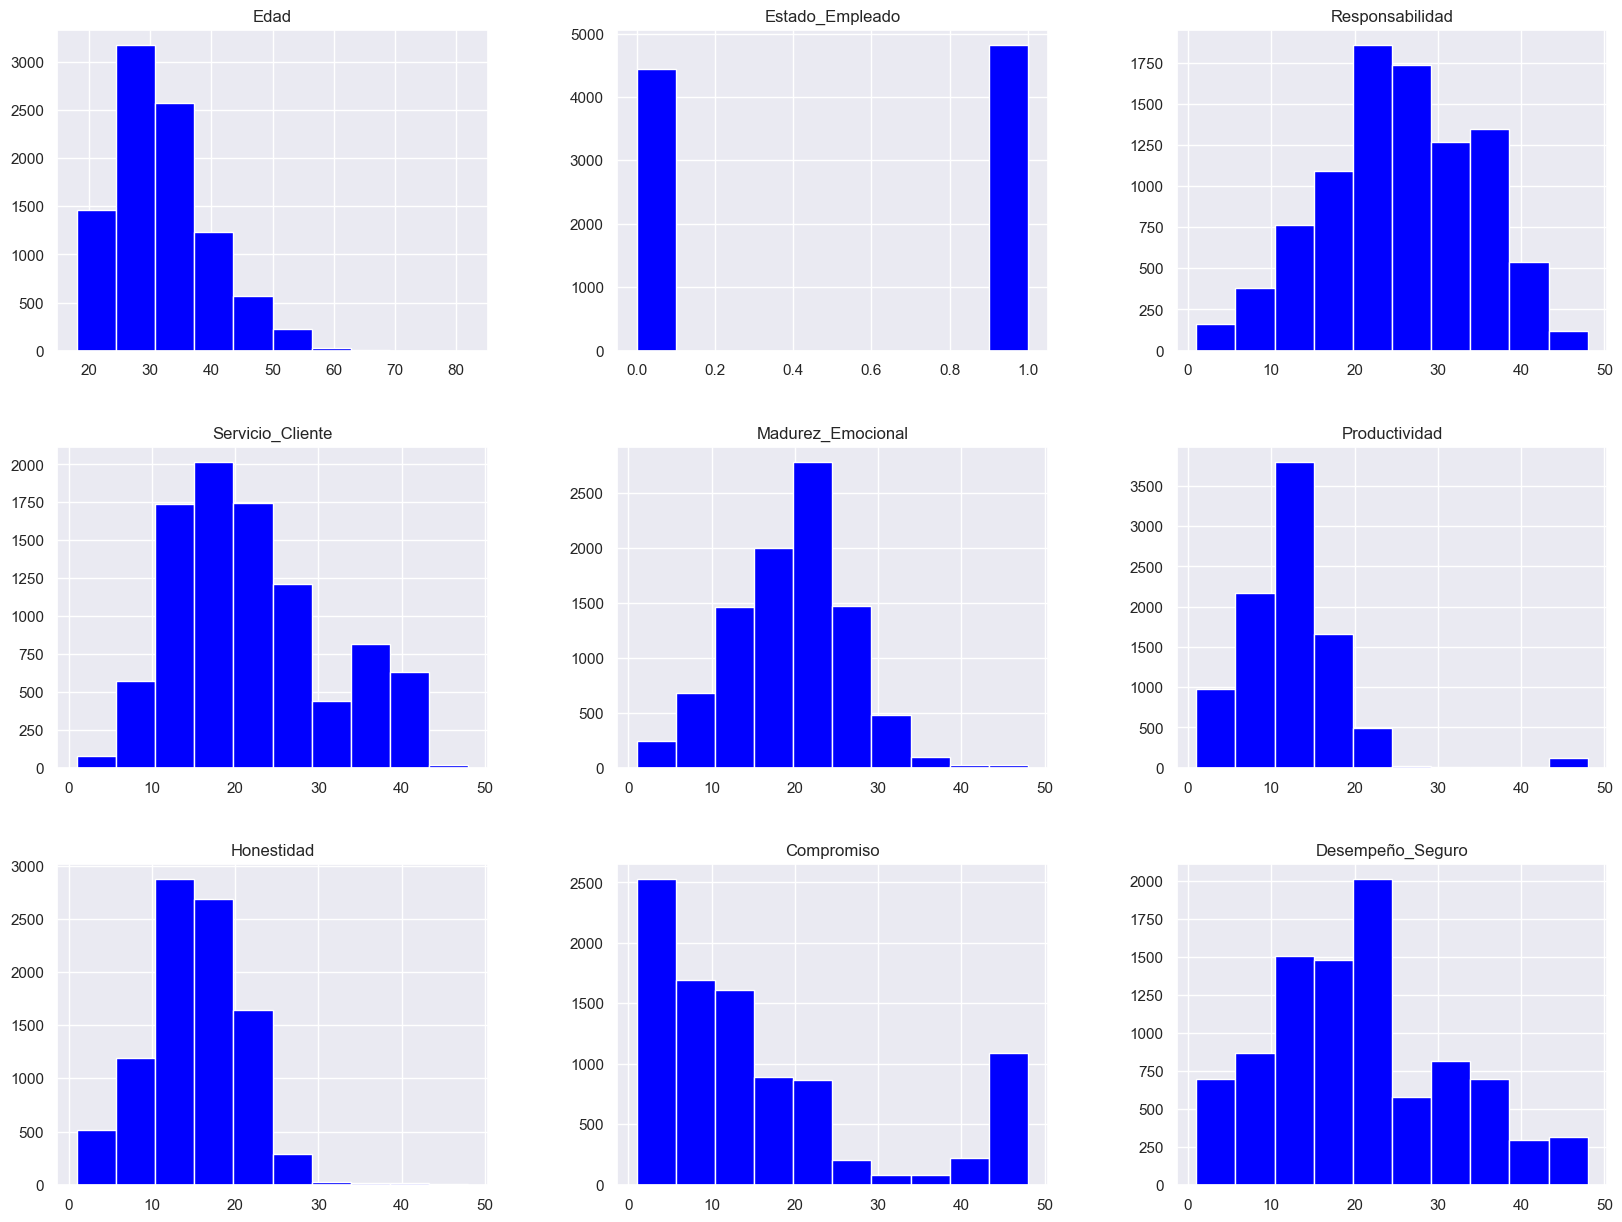

In [4]:
df.hist(figsize=(20,15), color = 'blue')
plt.show()

In [5]:
conteo = df.groupby('Estado_Empleado').size()
print("Actualmente tenemos un total de ",conteo[1],"Activos")
print("Actualmente tenemos un total de ",conteo[0],"Retirados\n")
print("* = "*15,"\n")
df.info()

Actualmente tenemos un total de  4818 Activos
Actualmente tenemos un total de  4446 Retirados

* = * = * = * = * = * = * = * = * = * = * = * = * = * = * =  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 0 to 11228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Edad               9264 non-null   int64 
 1   Genero             9264 non-null   object
 2   Tpo_Contrato       9264 non-null   object
 3   Estado_Empleado    9264 non-null   int64 
 4   Responsabilidad    9264 non-null   int64 
 5   Servicio_Cliente   9264 non-null   int64 
 6   Madurez_Emocional  9264 non-null   int64 
 7   Productividad      9264 non-null   int64 
 8   Honestidad         9264 non-null   int64 
 9   Compromiso         9264 non-null   int64 
 10  Desempeño_Seguro   9264 non-null   int64 
 11  ERI                9264 non-null   object
dtypes: int64(9), object(3)
memory usage: 940.9+ KB


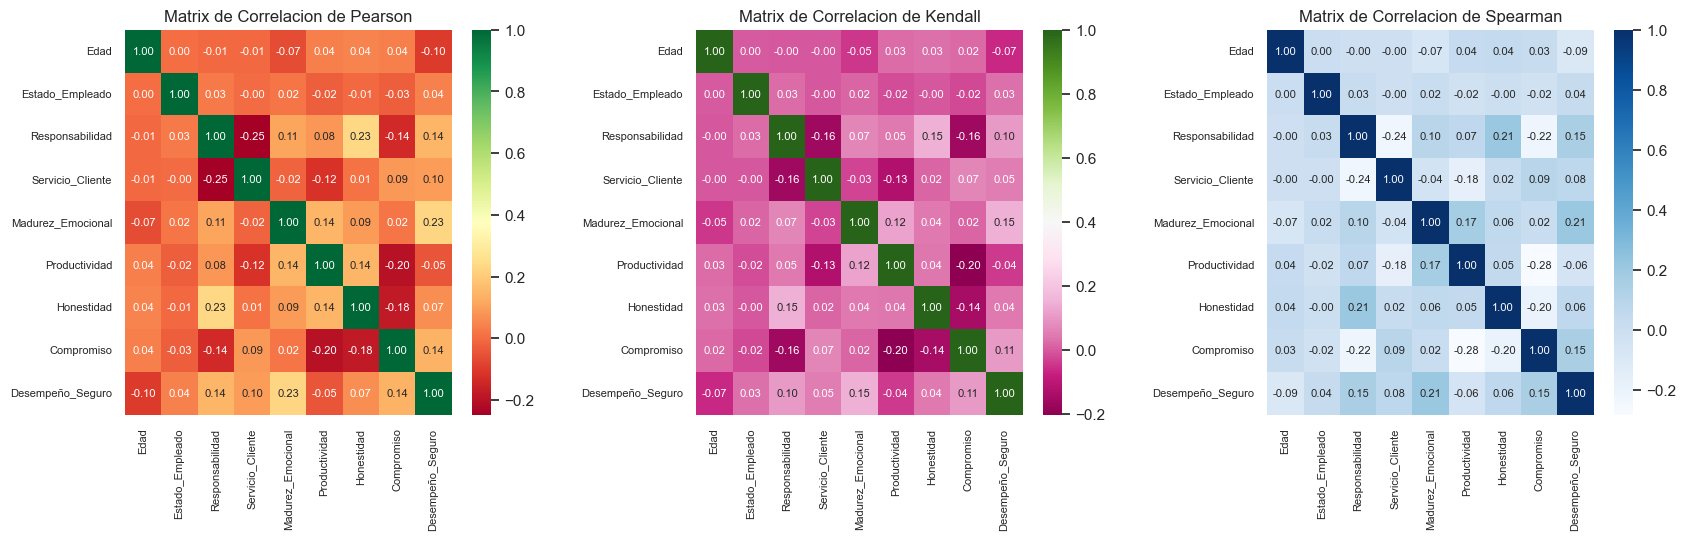

In [6]:
# Calculo las matrices de correlación usando el metodo de pearson , kendall y spearman
Pearson = df.corr(numeric_only=True)
Kendal = df.corr(method='kendall', numeric_only=True)
Spearman = df.corr(method='spearman', numeric_only=True)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))# Crear la figura y los subplots
# Matriz de correlación Pearson
sns.heatmap(Pearson, annot=True, cmap='RdYlGn', fmt=".2f", annot_kws={"size": 8}, ax=axes[0])
axes[0].set_title('Matrix de Correlacion de Pearson', fontsize=12)
axes[0].tick_params(labelsize=8)
# Matriz de correlación Kendall
sns.heatmap(Kendal, annot=True, cmap='PiYG', fmt=".2f", annot_kws={"size": 8}, ax=axes[1])
axes[1].set_title('Matrix de Correlacion de Kendall', fontsize=12)
axes[1].tick_params(labelsize=8)
# Matriz de correlación Spearman
sns.heatmap(Spearman, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 8}, ax=axes[2])
axes[2].set_title('Matrix de Correlacion de Spearman', fontsize=12)
axes[2].tick_params(labelsize=8)
plt.subplots_adjust(wspace=0.4)# Ajusto los espacios entre los subplots
plt.show()


## Corvertir a variables dummies

In [7]:
df =pd.get_dummies(data =df)
df.head()

,Edad,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,Genero_F,Genero_M,Tpo_Contrato_Fijo,Tpo_Contrato_Indefinido,ERI_DP,ERI_FP,ERI_NV,ERI_PS
0,36,0,42,25,20,10,23,21,37,0,1,1,0,0,0,0,1
1,37,0,16,11,31,14,8,3,15,0,1,1,0,0,0,0,1
2,40,0,33,22,21,13,22,20,42,0,1,1,0,0,0,0,1
3,35,0,24,21,25,17,21,7,17,0,1,1,0,0,0,0,1
4,42,0,40,23,31,48,25,40,23,1,0,1,0,0,0,0,1


### Separacion de Datos

In [8]:
x = df.loc[:,df.columns!='Estado_Empleado']
y = df['Estado_Empleado']
print(x.shape)
print(y.shape)

(9264, 16)
(9264,)


## Creando datos de conjunto de Entrenamiento y Validacion

In [9]:
#Separo datos de entrenamiento y prueba 70 y 30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Estandarizacion
Se Utiliza para equilibrar los datos y evitar que una varaible pese mas que otra debido al numero de sus datos

In [10]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [11]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [12]:
# Normalización de los datos para el Df Activos y aplicamos el Reset al index ya que me puso valores diferentes sin la variable objetivo
#df = (df-df.min())/(df.max()-df.min())
#df.describe()

### Entrenamiento SVM Lineal:
### Entrenamiento SVM con kernel RBF:
### Entrenamiento SVM polinomial:
### Entrenamiento SVM sigmoidal:
Este Modelo 

In [13]:
from sklearn import svm

In [14]:
linear_svm = svm.SVC(kernel='linear',C=0.001) #primero probe con el parametro 0.005 para despues ajustarlo 
linear_svm.fit(x_train_std, y_train)

SVC(C=0.001, kernel='linear')

In [15]:
#Prediciendo SVM Lineal
y_train_predict = linear_svm.predict(x_train_std)
y_test_predict = linear_svm.predict(x_test_std)

In [16]:
#Rendimiento elModelo Linear
from sklearn.metrics import accuracy_score, confusion_matrix


In [17]:
confusion_matrix(y_test, y_test_predict)
#Se tuvieron 1103 + 508 Aciertos diagona 1
# Se tuvieron 941 + 228 clasificados mal

array([[1103,  228],
       [ 941,  508]])

In [18]:
accuracy_score(y_test, y_test_predict)


0.5794964028776979

In [19]:
linear_svm.n_support_

array([2895, 2897], dtype=int32)

In [20]:
#buscando elmejor valor C para svm Linear
from sklearn.model_selection import GridSearchCV
params = {'C': [0.0001, 0.001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1]}
linear_svm = svm.SVC(kernel='linear')

In [21]:
svm_Grid_lin = GridSearchCV(linear_svm, params, n_jobs=-1, 
                            cv=10, verbose=1, scoring='accuracy')
svm_Grid_lin.fit(x_train_std, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1]},
             scoring='accuracy', verbose=1)

In [22]:
svm_Grid_lin.best_params_

{'C': 0.001}

## Entrenamiento  SVM Polinomial

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [24]:
polinomial = SVC(kernel='poly', degree=3, C=0.05) #Adicional hay que colocarle uos grados 'degree' y el valor 'C'
polinomial.fit(x_train_std, y_train)

SVC(C=0.05, kernel='poly')

In [25]:
y_train_predict = polinomial.predict(x_train_std)
y_test_predict = polinomial.predict(x_test_std)

In [26]:
accuracy_train = accuracy_score(y_train, y_train_predict) #Predigo y y tiene un 57% de aciertos
accuracy_test = accuracy_score(y_test, y_test_predict)

In [27]:
print("Accuracy en entrenamiento:", accuracy_train)
print("Accuracy en prueba:", accuracy_test)

Accuracy en entrenamiento: 0.5900678593460826
Accuracy en prueba: 0.576978417266187


In [28]:
polinomial.n_support_

array([2991, 2991], dtype=int32)

In [29]:
#Optimizacion SVM Polinomial
params = {'C': [0.0001, 0.001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1],
          'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [30]:
polinomial = SVC(kernel='poly')#Lo metemos al kernel 'poly'

In [31]:
grid_search = GridSearchCV(polinomial, params, n_jobs=-1, 
                           cv=10, verbose=1, scoring='accuracy')

In [32]:
grid_search.fit(x_train_std, y_train)

Fitting 10 folds for each of 88 candidates, totalling 880 fits


GridSearchCV(cv=10, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1],
                         'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [33]:
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

Mejores parámetros: {'C': 0.05, 'degree': 3}


In [34]:
polsvm = grid_search.best_estimator_

In [35]:
accuracy_score(y_test, polsvm.predict(x_test_std))

0.576978417266187

In [36]:
confusion_matrix(y_test, y_test_predict)

array([[1079,  252],
       [ 924,  525]])

## Entrenamiento Radial y Optimizacion

In [37]:
radial = svm.SVC(kernel='rbf', gamma=0.001, C=0.05)
radial.fit(x_train_std, y_train)

SVC(C=0.05, gamma=0.001)

In [38]:
y_train_predict = radial.predict(x_train_std)
y_test_predict = radial.predict(x_test_std)

In [39]:
accuracy_score(y_test, y_test_predict)

0.5212230215827338

In [40]:
radial.n_support_

array([3115, 3119], dtype=int32)

In [41]:
#Optimizacion SVM Radial
params = {'C': [0.0001, 0.001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1],
          'gamma': [0.001, 0.01, 0.1, 0.5, 1, 1,5,2]}

In [42]:
radial = svm.SVC(kernel='rbf')

In [43]:
svm_grid_radial = GridSearchCV(radial, params, n_jobs=1,
                               cv=3, verbose=1, scoring='accuracy')

In [44]:
svm_grid_radial.fit(x_train_std, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1, 1, 5, 2]},
             scoring='accuracy', verbose=1)

In [45]:
svm_grid_radial.best_params_

{'C': 0.5, 'gamma': 0.001}

In [46]:
radsvm_clf = svm_grid_radial.best_estimator_

In [47]:
accuracy_score(y_test, radsvm_clf.predict(x_test_std))

0.5794964028776979